<a href="https://colab.research.google.com/github/hongqin/R-covid19-bootcamp-2020Dec/blob/main/R_coding_bootcamp_2020Dec19_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# First, please make a copy to your own Google Drive. 
**Please make a copy of this code in your CoLab in order to modify and run the code**. <br> 
**Please rename the file  as LastName-FirstName-R-coding-bootcamp-2020Dec19-23 so that teaching-assistants can help you** 
<br> 
You can do this by select "File" -> "Save a copy in Drive"

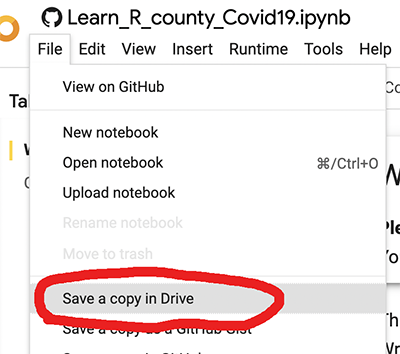



---



This is a short tutorial on using R to explore Covid19 data using Google CoLab <br>
Written by Hong Qin <br>
This version is modifed for a high-school coding bootcamp on Dec 19-23, 2020.

This is a work in progress and is for educational purpose only. 

This is code can be cloned from
https://github.com/hongqin/Use-R-in-CoLab/blob/master/Learn_R_UALR_CoLab.ipynb

More tutorials at http://YouTube.com/hongqin

# Prepartion 1. Get familiar with Google CoLab

## The 'Code' and 'Text' cells
The code cell can be run by click the play icon on the upper-left corner of the code cells.

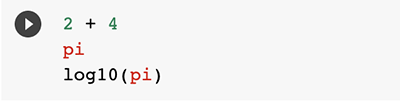

The menu on the top


## File, Edit, Insert, Runtime, Tools

## Table of contents and the left-sided panel

# Chapter 1. Basics of R coding

## What is R? 
It is a popular language for data analysis. See

https://en.wikipedia.org/wiki/R_(programming_language) 

There are many books on how to use R. This exercise is only meant to show some basics of R to you.

This Chapter took about 80 minutes on Dec 19, 2020

## Simple calculation

In [ ]:
2 + 5
pi
log10(pi)

In [ ]:
2*3.14
9/2.5
9-5

## Use variables

The = sign means assignment in R and many other programming languages.

In [ ]:
x = 2 #assign 2 as a value to x
y = 3 #assign 3 as a value to y
z = x  + y
z

## The # sign means comments (not code)

In [ ]:
# We can add some inforamtive comments here
 x = 2 #This is also a comment. # is a good trick in coding to debugging. 
 x

## A list of numbers is called a Vector in R

In [ ]:
a_vector = c(1, 3.14159, 5.0, -1, 10) # c( ) is the syntax for defining a vector 
a_vector

In [ ]:
b_vector= a_vector + c(2, 0.5, -5, 1, -10)
b_vector

In [ ]:
c_vector = a_vector + 10
c_vector

## Vectors can be indexed. 


In [ ]:
a_vector = 4:20 #The colon sign is a symbol mean from 4 to 20
a_vector

In [ ]:
a_vector[1] #first element of the vector

In [ ]:
a_vector

### **Question**: How to find the 9-th element? 

## Functions in R uses smooth parentheses

A function that generates a list of numbers from 4 to 100 with a step of 2

In [ ]:
seq(4, 100, 2) 

The function rnorm() generate random number based on Gaussian distribution

In [ ]:
x = rnorm(100) #generate 100 normal-distributed (Gaussian) random nubmers 
y = x + rnorm(100)*10 # y is a linear transformation of x with some Gaussain noise
m = lm( y ~ x) # linear regression, find a straight line between y and x
plot( y ~ x) #scatter plot
abline(m, col='red') #add a line 
summary(m) #reporting

## Looking for helps. 
This can be done by a question mark or help(). 

In [ ]:
?rnorm

In [ ]:
?lm

In [ ]:
?abline

In [ ]:
help(seq)

## Load Libraries
Libraries are software tools developed by many people around the world.

In [ ]:
library(tidyverse)
library(dplyr)

## Dataframe - the spreadsheet in R
Dataframe is a basic tool to handle data in R, in some ways like a spreadsheet in Microsoft Excel.

Now, let's load a small demo spreadsheet from a website

In [ ]:
tb = read_csv("https://raw.githubusercontent.com/hongqin/Use-R-in-CoLab/master/vip-grades.csv")

In [ ]:
tb #look at the small table. Not a good idea for large table

In [ ]:
head(tb) #look at just a few row of the table

### pick rows and columns using indices

In [ ]:
tb[1,] #first row, value before a comma

In [ ]:
tb[, 2] #second column

In [ ]:
tb[2:3, 2:3] # 2nd, 3rd rows, 2nd and 3rd columns

In [ ]:
tb[c(1,5,9), 1:2] # the 1st, 5th, and 9th rows, two columns

### Pick a colum with $ or index

In [ ]:
tb$GPA

In [ ]:
tb[, 2]

### Pick a row 

In [ ]:
tb[1,]

### use fancy tidyverse

In [ ]:
tb %>% dplyr::select( name, GPA )  %>% filter (GPA >= 3.0)

In [ ]:
tb %>% dplyr::select( College ) %>% distinct #how many colleges are there? 

In [ ]:
tb %>% dplyr::filter (College == "ArtsScience")


In [ ]:
tb %>% dplyr::filter (College == "Engineering")

### Question: Are GPA different between VIP students in Egnineering versus Art and Science? 

We can do a t-test. 

In [ ]:
tbEng = tb %>% dplyr::filter (College == "Engineering") 
tbAS = tb %>% dplyr:: filter (College == "ArtsScience")
t.test( tbEng$GPA, tbAS$GPA) # a t-test

Generally, a p-value larger than 0.05 means no significant difference in the statistical sense. 

For more information on p-value, see 
https://en.wikipedia.org/wiki/P-value

## Stopped here on Dec 19, 2020 after ~ 1 hour and 20 minutes

# Preparation 2. The COVID19 open data


A popular source for reporting COVID cases is the site built by researchers at the John Hopkins University (JHU). This JHU data set is publically available and will be used in our study. 

There are many other COVID19 data set, see
https://en.wikipedia.org/wiki/COVID-19_datasets


# Chapter 2, Explore the USA county-level COVID19 case data


We will go through the COVID19 case data set and learn more R on the way. 



First, install and load some necessary packages

In [ ]:
install.packages('reshape2')
library(tidyverse)
library(lubridate)
library(reshape2)
library(ggplot2)
library(dplyr)

## Load the COVID19 data into a dataframe

In [ ]:
# load JHU covid19 data set with tidyverse read_csv
# this is the URL for "view raw " for csv files on GitHub
tb = read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")


In [ ]:
head(tb)

## Pick rows, columns, and cells in DataFrames

A a_ij


In [ ]:
# pick first row, second colum
tb[1,2] 

# pick 4th row, 5th colum. Notice that R starts with 1, not zero like Python
tb[4, 5]

In [ ]:
tb[6,6]

In [ ]:
# pick first column and  first 10 rows
tb[ 1:10, 1]

In [ ]:
# pick 6-7th rows, 4-8 colums
tb[ 6:7, 4:8]

In [ ]:
# The daily cases data started on the 12th column
tb[ 1:5, 1:12]

In [ ]:
?length

In [ ]:
# how many columns? 
length(tb[1,])
print(paste( "There are ", length(tb[1,]), " columns"))

In [ ]:
# view the first 5 rows in all data columns
tb[3000:3006 , 12: length(tb[1,])  ]

## Select columns of daily cases

select the all columns of actual data, from the 12 th column to the last column.

In [ ]:
tb %>% dplyr::select( 12:length(tb[1,]) ) #It seems that CoLab often rquire explicit pakcage for function calls. 

## Rotate the data so that data of each county is in one column

In [ ]:
# We need save the data into a new variable 'tb1' so that computer can remember it
tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1)) # t for transpose, then convert to a dataframe
tail(tb1)

## Add meaning columns names

The Combined_Key are useful column names

In [ ]:
names(tb1) = tb$Combined_Key
#tail(tb1[100:110,1:10])
tail(tb1[,1:10])


## Convert dates from text format to actual Date type

see https://lubridate.tidyverse.org/ 

In [ ]:
library(lubridate)
date("10/1/2020")

In [ ]:
current_dates = names(tb)[12:length(tb[1,])]
class(current_dates)
current_dates

In [ ]:
mdy(current_dates[1:10])

In [ ]:
tb1$dates = mdy(current_dates)
tail(tb1)

## Select a time window (row window) using 'filter'

In [ ]:
tb1 %>% filter( dates > mdy("4/30/2020"), dates < mdy("5/31/20")) %>% head()

In [ ]:
start = mdy("9/14/20")
start + ddays(13)

In [ ]:
tb1 %>% dplyr::filter( dates >= start, dates <=  start + ddays(13)) %>% dplyr::select(1:5)

## Plot a time window

In [ ]:
start = mdy("9/16/20")
start + ddays(14)

tb_sub <- 
 tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select( c(1:5), dates)

tb_sub

In [ ]:
ggplot(tb_sub, aes( x = dates, y=tb_sub[,3])) + geom_point() + geom_smooth()

## Stopped here on Satuday Dec 19 at 3:30pm after 2 hours of coding. 

# Chapter 3, Let's look a specific county. 
How about Hamilton, TN? This is the county where Chattanooga, TN is located.


### Define the specific county. CHANGE HERE FOR YOUR PROJECT

In [ ]:
mycountyname = 'Hamilton' #Change to your home county for your project
myState = 'Tennessee' #Change to your home state for your project
countyStateUSA = 'Hamilton, Tennessee, US' #Change based on your home county and state

In [ ]:
print(paste("There are ", length(names(tb1)[ grep( mycountyname, colnames(tb1))] ), mycountyname, "counties in the USA"))

In [ ]:
head(tb1)

In [ ]:
tb_mycounty <-  tb1 %>% 
   dplyr::select ( countyStateUSA, dates)

head(tb_mycounty)

In [ ]:
tb_mycounty <- tb_mycounty %>%
   dplyr::filter( between(dates, mdy('4/1/20'), mdy('10/20/20')))
head(tb_mycounty)

In [ ]:
ggplot(tb_mycounty, aes( x = dates, y=tb_mycounty[,1])) + geom_point() + geom_smooth()

# Chapter 4. Look at daily cases

## Define the county and state. Change to your home county and state for your project

In [ ]:
mycounties = c( 'Hamilton, Tennessee, US') #Change to your home county and state

   ## Read the cumulative cases again

In [ ]:
tb = read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)
#head(tb1)

days_window = 300  # time  window
endday = today(tzone ='EST')

tb_sub <- tb1 %>% 
  dplyr::select( all_of(mycounties), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

## Covert cumulative counts into daily cases

The diff() function is helpful here. 

### Question: How do we find out the help page for diff()? 

In [ ]:
tb_sub[,1]

In [ ]:
local_dailycases = c(0, diff( tb_sub[,1] )) 
str(x)

In [ ]:
tb_daily_sub = data.frame( local_dailycases )
head(tb_daily_sub)

In [ ]:
tb_daily_sub$YMD = mdy(row.names(tb_sub))
head(tb_daily_sub)

In [ ]:
row.names(tb_daily_sub) = tb_daily_sub$YMD #add row names

In [ ]:
names(tb_daily_sub)[1] = mycounties #add column names

In [ ]:
tail(tb_daily_sub)

## Plot the daily cases

In [ ]:
myplot <- ggplot(tb_daily_sub, aes(x=YMD, y=tb_daily_sub[,1]))
myplot + geom_point() + stat_smooth(span=0.3)

# Chapter 5. Google Mobility analysis


## Background, mobility and social distance

Mobility can gauge the social distance practice

Google Community Mobility report 
https://www.google.com/covid19/mobility/

## Regional mobility

We can download Google community mobility report directly to CoLab

In [ ]:
system("wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip")

We should now see "Region_Mobility_Report_CSV.zip" in /content folder. 

We can unzip this file to get the csv file.

In [ ]:
system("unzip /content/Region_Mobility_Report_CSVs.zip")

We should now see "/content/2020_US_Region_Mobility_Report.csv"

In [ ]:
library(tidyverse)
tbGMUS = read_csv("/content/2020_US_Region_Mobility_Report.csv")
tail(tbGMUS)

It seems Google Mobility not updated daily.

## Pick Mobility data from my county. 

### Define the location. CHANGE HERE FOR YOUR PROJECT

In [ ]:
myState = 'Tennessee'
myCounty = "Hamilton County" #Google location is different from JHU

## Parse the mobility data for the location

In [ ]:
tbGMmycounty <-
  tbGMUS %>% filter( sub_region_1 == myState, sub_region_2 == myCounty)
head(tbGMmycounty)

In [ ]:
tail(tbGMmycounty)

In [ ]:
length(names(tbGMmycounty))

In [ ]:
max(tbGMmycounty$date) #the most recent date of the mobility report

## Merge mobility and covid19 data for our location/county





First, pick the daily case of my county

In [ ]:
head( tb_daily_sub)

In [ ]:
tb_daily_mycounty = tb_daily_sub
names(tb_daily_mycounty) = c("DailyCases", "date")
tail(tb_daily_mycounty)

Now, find the shared time window
between tb_daily_sub and tbGMmycounty


In [ ]:
 tb_GMCovidmycounty = merge(x=tb_daily_mycounty, y=tbGMmycounty, by= 'date', all.y=FALSE)
 row.names(  tb_GMCovidmycounty ) =  tb_GMCovidmycounty$date

In [ ]:
tail( tb_GMCovidmycounty )

In [ ]:
print( paste( "There are ", length(tb_GMCovidmycounty[1,]), "columns"))

### select columns with mobility values

In [ ]:
tb_GMCovidmycounty2  <- tb_GMCovidmycounty  %>% dplyr::select(2, 10:15 ) # select values columns
head(tb_GMCovidmycounty2 )

## Normalize the mobility data for overlay

In [ ]:
tb_GMCovidmycounty_scaled <-  data.frame( scale(tb_GMCovidmycounty2) )
head( tb_GMCovidmycounty_scaled  )

In [ ]:
# add the date column back
tb_GMCovidmycounty_scaled$date = ymd(row.names(tb_GMCovidmycounty_scaled))
tail( tb_GMCovidmycounty_scaled  )

## Overlay mobility and daily cases

In [ ]:
names(tb_GMCovidmycounty_scaled )

In [ ]:
selected_columns = c('DailyCases', 'retail_and_recreation_percent_change_from_baseline', 
'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

#selected_columns = c('DailyCases','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

df_melt <- melt(tb_GMCovidmycounty_scaled, measure.vars=selected_columns, value.names="Values", varialbe.name="varialbe" )
ggplot(df_melt, aes(x=date, y=value, color=variable)) + stat_smooth(span=0.3)


# Chapter 6. Does the local weather correlared with Covid19 ?  

### Get weather data from Local airport

See https://rdrr.io/cran/worldmet/man/importNOAA.html 

This installation may take about 10 minutes

In [ ]:
#This ensure worldmet is installed only once and save time.
packages <- c("worldmet")
install.packages(setdiff(packages, rownames(installed.packages()))) 

In [ ]:
library(worldmet)

## Find out the latitude and longitude of the location. CHANGE HERE FOR YOUR PROJECT

We can google for latitude and longitude for a location. 
For example,  "Fairfax county, VA latitude longitude"

The continent USA have Longitute West, and should be negative. 

For example, Lovell, TN is 35.03, -85.2. 

In [ ]:
info <- getMeta(lat = 35.03, lon = -85.2) # Lovell, TN
info

Pick the first row

In [ ]:
local_code = paste( info$usaf[1], info$wban[1], sep='-')
local_code

Now, get weather data from NOAA

In [ ]:
weatherLocal <- importNOAA(code = local_code, year = 2020)
head(weatherLocal)

In [ ]:
names(weatherLocal)

In [ ]:
library(ggplot2)
ggplot(weatherLocal, aes(x=date,y=dew_point)) + geom_line() + stat_smooth(span=0.3)

In [ ]:
ggplot(weatherLocal, aes(x=date,y=air_temp)) + geom_line() + stat_smooth(span=0.3)

Pick air temperature, dew_point, and relative humidity

In [ ]:
weatherLocal2 <- weatherLocal %>% dplyr::select( c('date', 'air_temp', 'dew_point', 'RH'))
head(weatherLocal2)

### Reformate dates

In [ ]:
library(lubridate)

In [ ]:
clean_dates = gsub( " UTC ", "", weatherLocal2$date)
weatherLocal2$YMD = as.Date(clean_dates)
head(weatherLocal2)

Calculate the daily average weather measurement 

In [ ]:
weatherLocal3 <- weatherLocal2 %>% group_by( YMD ) %>% summarise_if( is.numeric, mean, na.rm=TRUE)

tail( weatherLocal3 )

### Merge local weather data with Covid19 data

In [ ]:
tail(tb_GMCovidmycounty2)
tb_GMCovidmycounty2$YMD = ymd( row.names(tb_GMCovidmycounty2) )

In [ ]:
tail(tb_GMCovidmycounty2)

The "merge()" is a uselful command

In [ ]:
tb_local=   merge(x=tb_GMCovidmycounty2, y=weatherLocal3, by= 'YMD', all.y=FALSE)
row.names( tb_local ) = tb_local$YMD
tail(tb_local)

In [ ]:
cbind( names( tb_local ), seq(1:length(tb_local[1,])))

In [ ]:
names(tb_local) = c("YMD", "DailyCases", "retail", "grocery", "parks", "transit", "workplace", "residential", "air_temp", "dew_point", "RH")

In [ ]:
startdate = mdy('3/1/2020')
enddate  = today(tzone='EST')

tb_local2 <- tb_local %>% 
  #dplyr::select( c(1,2,)) %>%
  dplyr::filter( between(YMD, startdate, enddate))
  
head( tb_local2 )


### plot cases and weather

In [ ]:
tb_local_scaled = data.frame( as.matrix(scale(tb_local2[,2:11])) )
tb_local_scaled$date = tb_local2$YMD

df_tmp <- melt(tb_local_scaled, measure.vars = c("DailyCases", "air_temp", "workplace", "residential" ), value.name = 'Measurements', variable.name = 'Types')
plot <- ggplot(df_tmp, aes(x=date, y=Measurements, color=Types)) + stat_smooth(span=0.3)
plot + ggtitle( paste( myCounty, myState))

# Chapter 7 (Optional), Explore the USA state-level data

Group by states

## Convert the county-level time series data to state-level data 

In [ ]:
tb0 = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb0)

merge all row of the same state by 'group_by'
follow by 'summarize_if'

In [ ]:
tb1 = tb0[, c(7, 50:length(tb[1,])) ]

tb2 <- tb1 %>%
  group_by(Province_State) %>%
  summarize_if(is.numeric, sum,na.rm=TRUE)

head(tb2)

In [ ]:
length( tb2$Province_State )
print( paste("There are ", length( tb2$Province_State ),  " states"))

## Covert cumulative counts into daily cases

### First, do a few tests on simple data sets to make sure that we know what we are doing.

In [ ]:
? apply

In [ ]:
? diff

In [ ]:
x = data.frame(1:10)
x

In [ ]:
apply(x, 2, diff)

In [ ]:
y = data.frame(10:1)
y

In [ ]:
apply(y, 2, diff)

### Now, process a small data set to verify the results

In [ ]:
test = tb2[1:5, 10:20]
test

In [ ]:
apply( test, 1, diff)

### Now, we are comfortable to apply our method to the entire data set. 

In [ ]:
tb3 = apply(tb2[, 2:length(tb2[1,])], 1, diff)
tb3= data.frame(tb3)
head(tb3)

## Add states names as columns names

Current names are not informative

In [ ]:
names(tb3)

Information of States will be more relevant.

In [ ]:
tb2$Province_State

Assign the columns names with the State-names

In [ ]:
names(tb3) = tb2$Province_State
head(tb3)

## Convert date-text to Date type

In [ ]:
row.names(tb3)

In [ ]:
tb3$dates = mdy(row.names(tb3))
head(tb3)

## Plot

In [ ]:
tb3[,2]

### Scatter plot with trend

In [ ]:
ggplot(tb3, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Plot for a time-window

In [ ]:
#end = mdy("5/1/20")
end = today(tzone='EST') - 1
end

In [ ]:
tb_sub <- 
 tb3 %>% filter( dates >= end- ddays(90), dates <  end) #This is 90 day window

ggplot(tb_sub, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Let's look a specific State. 
How about Tennessee? 

In [ ]:
names(tb3)

In [ ]:
days_window = 90 #90-day window
endday = today(tzone = 'EST')

tb_TN <- tb3 %>% 
  dplyr::select( 'Tennessee', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday)) 

In [ ]:
head(tb_TN)

In [ ]:
ggplot(tb_TN, aes(x=dates, y=tb_TN[,1])) + geom_point() + geom_smooth()

### Multiple plots to compare two states

In [ ]:
days_window = 90 #90-day window
endday = today(tzone='EST') -1

mystates = c('Tennessee', 'Wisconsin', 'South Dakota')

tb_2States <- tb3 %>% 
  dplyr::select( c(mystates, 'dates') ) %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_2States)

In [ ]:
library(reshape2)

In [ ]:
df_tmp <- melt(tb_2States, measure.vars = mystates)
head(df_tmp)

In [ ]:
names(df_tmp) = c("dates", "State", "DailyCases")
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases, color=State)) + geom_point() + stat_smooth(spanc=0.3)

### How about more than two states? 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 90 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


In [ ]:
df_tmp <- melt(tb_sub, measure.vars = mystates, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(DailyCases), color=State)) + geom_point() + geom_smooth() 

# Chapter 8 (Optional). Transmission analysis

### Study the Germany 1918 example

In [ ]:
install.packages('R0', lib = '/content')
#library('R0')
library("R0", lib.loc="/content")

In [ ]:
help(package='R0')

In [ ]:
#?est.R0.AR
#$example(est.R0.AR)

In [ ]:
data(Germany.1918)
head(Germany.1918)

In [ ]:
str(Germany.1918)

In [ ]:
plot(Germany.1918)

In [ ]:
?est.R0.TD

In [ ]:
example(est.R0.TD)

In [ ]:
mGT <- generation.time("gamma", c(3,1.5))
SB <- est.R0.SB(Germany.1918, mGT, begin=1, end=100)
str(SB)

In [ ]:
plot(SB)

### Estimate Rt to Covid19 for Tennessee

The mean generation time of Covid19 is estimated to 4-5 days. 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 180 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

In [ ]:
length(tb_sub[,1])

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5)) #model of serial generation time for SARS-CoV-2, (4, 7)
mGT

In [ ]:
TD <- est.R0.TD(tb_sub$Tennessee, mGT, begin=1, end=181, nsim=100)

In [ ]:
#str(TD)
length(tb_sub[,1])

In [ ]:
tb_sub$Rt = TD$R

In [ ]:
ggplot( tb_sub, aes(x=dates, y=Rt) ) +
   geom_point() + 
   stat_smooth( span=0.4)

## How about Hamilton County, TN? 

In [ ]:
install.packages('R0')
library('R0')

In [ ]:
library(tidyverse)
library(lubridate)
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)

### Select Hamilton, Tennessee, US

In [ ]:
names(tb1) [grep(  "Tennessee", names(tb1))]

In [ ]:
window = 180

tb_sub <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'Davidson, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, today(tzone='EST') - window,  today(tzone ='EST')))

str(tb_sub)

In [ ]:
ggplot(tb_sub, aes(x=dates, y=tb_sub[,1])) + geom_point()

In [ ]:
tail(tb_sub)

### Estiamte daily cases

March 31 Tuesday has 15 cases, but Sunday and Monday has zero cases. 

Hong will try to spead the spike daily counts into previous days with zeros. 

In [ ]:
tb_daily_sub = data.frame( apply(tb_sub[,1:2], 2, diff) )
head(tb_daily_sub, n=15)

In [ ]:
wday(mdy('3/31/20'))

In [ ]:
tb_daily_sub$YMD = mdy(row.names(tb_daily_sub))
head(tb_daily_sub)

In [ ]:
# make sure all daily cases are positive integer or zeros
tb_daily_sub$Hamilton..Tennessee..US[tb_daily_sub$Hamilton..Tennessee..US<0 ] =0
head(tb_daily_sub)
summary(  tb_daily_sub)

In [ ]:
# correct some errors in Hamilton TN 
#tb_daily_sub[c('3/20/20', '3/21/20'), 1] = c(1,1)
#tb_daily_sub[c('3/24/20', '3/25/20'), 1] = c(7, 7)
#tb_daily_sub[c('3/29/20', '3/30/20', '3/30/20'), 1] = c(5, 5, 5)

In [ ]:
tail(tb_daily_sub)

In [ ]:


myplot <- ggplot( tb_daily_sub, aes(x=YMD, y=Hamilton..Tennessee..US)) + geom_point() + stat_smooth(span=0.3) 
myplot + ggtitle("Daily Cases in Hamilton County, TN") +  theme(plot.title = element_text(hjust = 0.5))

### Estimate Rt for Hamilton, TN

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5)) #based on literature reading serial generation time (incubtation time) (4-7), with long distbution
x = tb_daily_sub[,1]
x[x<0]= 0
length(x)
summary(x)
plot(x)

In [ ]:
start = 1
offset = 1
stop = length(x)-offset # Rt estimation need a few day, try 5 days

TD<- est.R0.TD(x, mGT, begin=start, end=stop, nsim=100) 

In [ ]:
#str(TD)

In [ ]:
tb_daily_sub$RtHamilton =  c( TD$R, rep(NA, offset))

In [ ]:
head(tb_daily_sub)

In [ ]:
tail(tb_daily_sub)

In [ ]:
number_of_rows = length(tb_daily_sub[,1 ])
tb_daily_sub$RtHamilton[ 1 : 5] = NA #remove first 5 rows 
tb_daily_sub$RtHamilton[ (number_of_rows-offset-2) :number_of_rows] = NA #remove last few rows

In [ ]:
# add dates
list_of_dates = row.names( tb_daily_sub)
tb_daily_sub$dates = mdy( list_of_dates )

In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y=RtHamilton) ) +
  geom_point() +
  stat_smooth(span=.35) +
  ggtitle("Effective Reproductive Number of Covid19, Hamilton, TN")

For policy and new related to Covid19 at Hamitlon, TN, see http://health.hamiltontn.org/AllServices/Coronavirus(COVID-19)/PressReleases.aspx  <br> 

March 13, first case. <br> 

April 27, governor order restaraunt reopenning. <br> 

July 4th, holiday weekend. If it happended to Hamilton, it might happend to other counties with similar densities? The TN state did show a spike after 4 of July <br> 


In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y= tb_daily_sub[,1] )) +
  geom_point() +
  stat_smooth(span=0.4) +
  ggtitle("Daily confirmed cases at Hamilton, TN")

### Can we remove some noises in Rt? (in progress)

In [ ]:
tb_daily_sub$index = 1: length( tb_daily_sub[,1]) 

loessSpan04 = loess( RtHamilton ~ index, data=tb_daily_sub, span=0.4 )

In [ ]:
plot( predict( loessSpan04))

In [ ]:
#str(loessSpan04)

In [ ]:
plot(loessSpan04$fitted)

# Chapter 9 (Optional) Global Daily cases 

In [ ]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

In [ ]:
head(gtb[, 5:length(gtb[1,])])

In [ ]:
g_cumulative = data.frame( apply( gtb[,5:length(gtb[1,])], 2, sum ))
str(g_cumulative)
head(g_cumulative)

In [ ]:
g_cummulative2= g_cumulative
g_cummulative2$Dates =  mdy(row.names(g_cummulative2))
names( g_cummulative2 ) = c("Daily_cases", "Dates")
head( g_cummulative2)

In [ ]:
ggplot( g_cummulative2, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Cumulative Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

In [ ]:
g_daily = data.frame(apply(g_cumulative, 2, diff))
g_daily$date = mdy(row.names(g_daily))
names(g_daily) = c("Daily_cases", "Dates")
head(g_daily)

In [ ]:
ggplot( g_daily, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Daily Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

In [ ]:
plot(x)

# Chapter 10 (Optional). Canada Covid19 data analysis

### pre-process

In [ ]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

In [ ]:
names(gtb)[1:2] = c("Province", "Country")
head(gtb)

In [ ]:
ctb <- gtb %>% 
 filter( gtb$Country == 'Canada')

head(ctb)

In [ ]:
ctb1 <- ctb %>% dplyr::select(5:length(ctb[1,])) %>% as.matrix()
ctb1 = as.data.frame(t(ctb1))
head(ctb1)

In [ ]:
names(ctb1) = ctb$Province
ctb1 = ctb1[ -c(1:50), ] #remove first 50 rows with very low numbers
head(ctb1)

## Convert cumulative values into daily new cases

In [ ]:
ctb2 = data.frame(apply(ctb1, 2, diff))
head(ctb2)

In [ ]:
current_dates = row.names(ctb2)
ctb2$dates = mdy(current_dates)
head(ctb2)

In [ ]:
#myprovinces = c('Alberta','British.Columbia', 'Ontario')
myprovinces = c('Alberta','Ontario')

days_window = 150 # time window
endday = today(tzone = 'EST') -1

tb_sub <- ctb2 %>% 
  dplyr::select( all_of(myprovinces), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_sub)

In [ ]:
install.packages('reshape2')
library(reshape2)
df_tmp <- reshape2::melt(tb_sub, measure.vars = myprovinces, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases,color=State)) + geom_point() + stat_smooth(span=0.3)

## Estimate Rt

In [423]:
install.packages('R0')
install.packages('reshape2')

library('R0')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [424]:
str(tb_sub)

'data.frame':	151 obs. of  3 variables:
 $ Alberta: num  141 0 247 111 0 0 304 80 133 113 ...
 $ Ontario: num  165 106 112 405 116 101 115 114 86 80 ...
 $ dates  : Date, format: "2020-07-21" "2020-07-22" ...


In [425]:
mGT<-generation.time("gamma", c(5, 1.5))
tmp = tb_sub[,2] #Ontario
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtOntario = TD$R


Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Using initial incidence as initial number of cases.”


In [426]:
tmp = tb_sub[,1] #Alberta
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtAlberta = TD$R


Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Using initial incidence as initial number of cases.”


In [427]:
tail(tb_sub)

,Alberta,Ontario,dates,RtOntario,RtAlberta
,<dbl>,<dbl>,<date>,<dbl>,<dbl>
12/13/20,1717,1702,2020-12-13,1.226186,0.8656316
12/14/20,1887,2194,2020-12-14,1.214989,0.8711013
12/15/20,1341,2166,2020-12-15,1.191829,0.8603127
12/16/20,1270,2235,2020-12-16,1.174731,0.8486720
12/17/20,1571,2430,2020-12-17,1.171586,0.8464597
12/18/20,1413,2282,2020-12-18,0.000000,0.0000000


In [428]:
df_tmp <- reshape2::melt(tb_sub[, 3:5], measure.vars = c("RtOntario", "RtAlberta"), value.name = 'Rt', variable.name = 'Rt_by_State')
df_tmp$Rt[ df_tmp$Rt==0] = NA
tail(df_tmp)


,dates,Rt_by_State,Rt
,<date>,<fct>,<dbl>
297,2020-12-13,RtAlberta,0.8656316
298,2020-12-14,RtAlberta,0.8711013
299,2020-12-15,RtAlberta,0.8603127
300,2020-12-16,RtAlberta,0.8486720
301,2020-12-17,RtAlberta,0.8464597
302,2020-12-18,RtAlberta,NA


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 42 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 42 rows containing missing values (geom_point).”


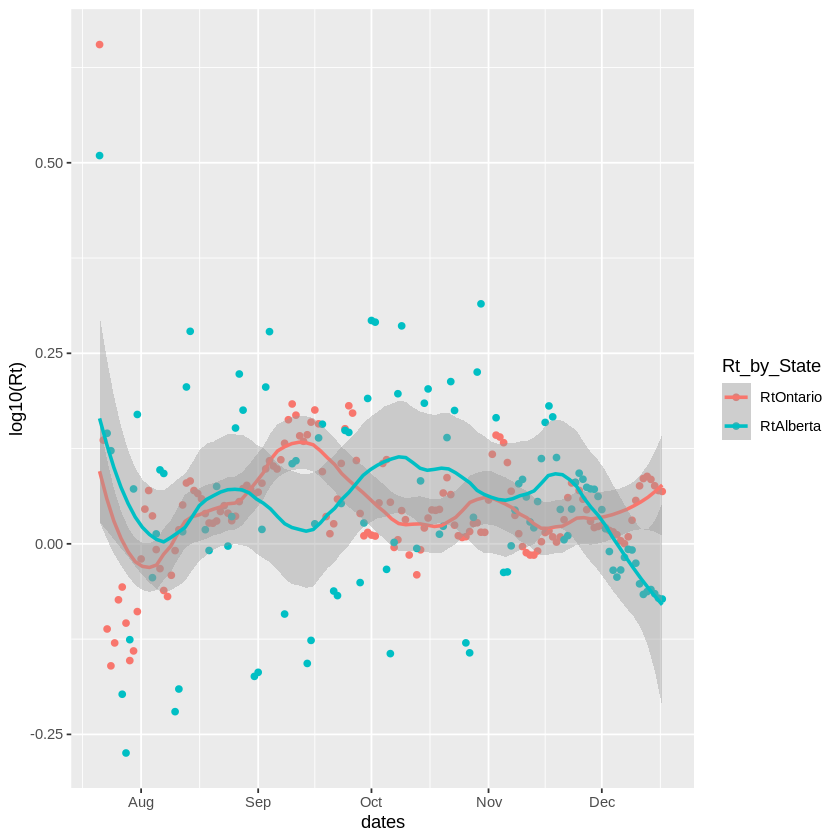

In [429]:
ggplot(df_tmp, aes(x=dates, y=log10(Rt), color=Rt_by_State) ) +
  geom_point() +
  stat_smooth(span=0.3)

# Sandbox

In [430]:
x <- runif(12,1,1.5)
y <- runif(12,1,1.5)
z <- runif(12,1,1.5)
m <- letters[1:12]
df <- data.frame(x,y,z,m)


In [431]:
#library(tidyverse)
#install.packages('reshape2')
library(reshape2)
library(ggplot2)
#when you melt essentially you create only one column with the value
#and one column with the variable i.e. your x,y,z 
df <- melt(df, id.vars='m')
head(df)

,m,variable,value
,<chr>,<fct>,<dbl>
1,a,x,1.291881
2,b,x,1.090924
3,c,x,1.088720
4,d,x,1.287930
5,e,x,1.227992
6,f,x,1.300956


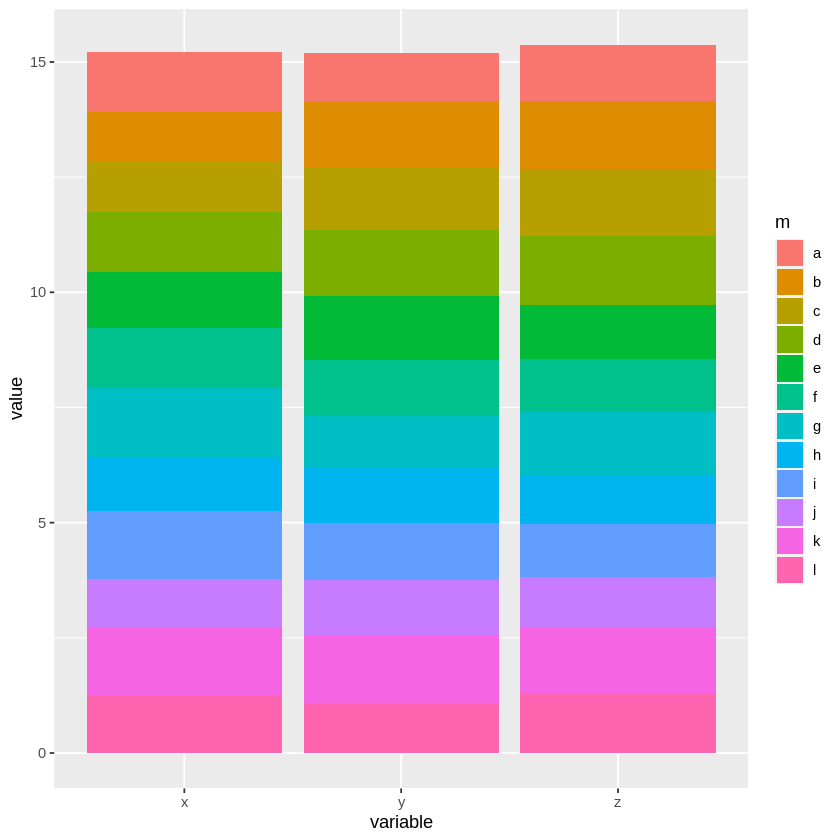

In [432]:
ggplot(df, aes(x=variable, y=value, fill=m)) + geom_bar(stat = 'identity')

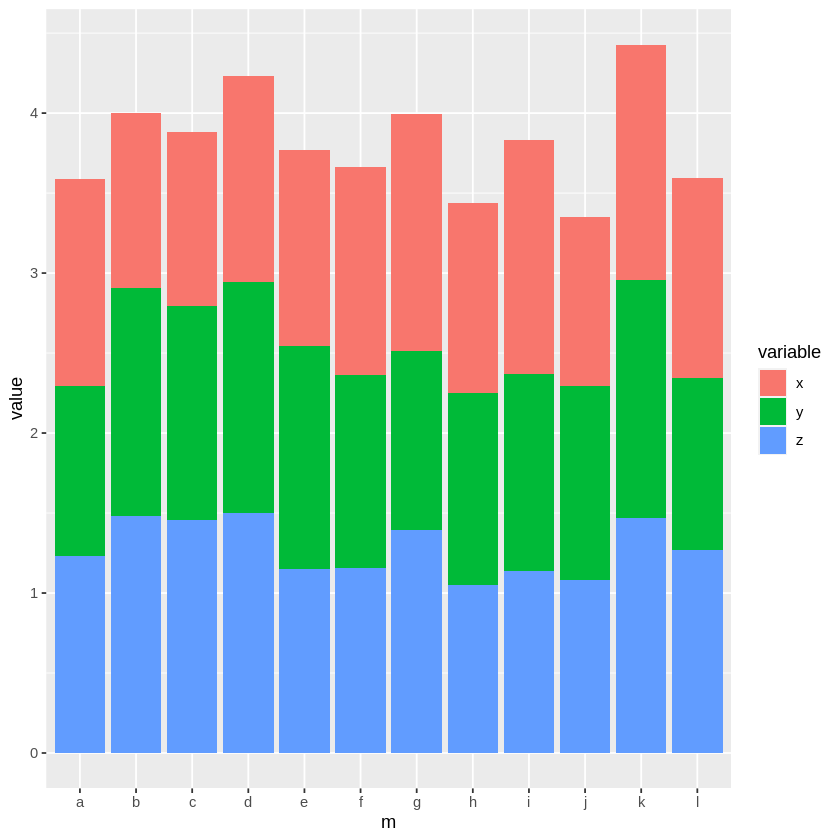

In [433]:
#ggplot it. x axis will be m, y will be the value and fill will be
#essentially your x,y,z

ggplot(df, aes(x=m, y=value, fill=variable)) + geom_bar(stat='identity')

## git clone? 

In [434]:
system("git clone https://github.com/hongqin/Use-R-in-CoLab.git")
system("ls")

In [435]:
system( "ls /content")